In [1]:
import numba
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from matplotlib import colors
import time
from IPython import display

In [87]:
@njit
def cond_inic(populacao):
    N = len(populacao[0])
    for i in range(N):
        for j in range(N):    
            populacao[i][j] = np.random.choice(2)
    return populacao

In [88]:
@njit
def matriz_ganho(aCbC, aCbD, aDbC, aDbD):
    a = np.zeros((2,2))
    a[0][0] = aCbC
    a[0][1] = aCbD
    a[1][0] = aDbC
    a[1][1] = aDbD
    return a

In [155]:
@njit
def ganho_total(populacao,i,j,payoff):
    N = len(populacao[0])
    ganho = 0
    
    if populacao[i][j] == 0:
        if populacao[i][(j+1)%N] == 0:
            ganho += payoff[1][1]
        else:
            ganho += payoff[1][0]
            
        if populacao[(i+1)%N][j] == 0:
            ganho += payoff[1][1]
        else:
            ganho += payoff[1][0]
            

        if populacao[i][(j-1)%N] == 0:
            ganho += payoff[1][1]
        else:
            ganho += payoff[1][0]

        if populacao[(i-1)%N][j] == 0:
            ganho += payoff[1][1]
        else:
            ganho += payoff[1][0]
            
    else:
        ganho += 1
        if populacao[i][(j+1)%N] == 0:
            ganho += payoff[0][1]
        else:
            ganho += payoff[0][0]
            
        if populacao[(i+1)%N][j] == 0:
            ganho += payoff[0][1]
        else:
            ganho += payoff[0][0]
            

        if populacao[i][(j-1)%N] == 0:
            ganho += payoff[0][1]
        else:
            ganho += payoff[0][0]

        if populacao[(i-1)%N][j] == 0:
            ganho += payoff[0][1]
        else:
            ganho += payoff[0][0]
            
    return ganho

In [156]:
@njit
def evolui_contaminacao(populacao,payoff,k):
    N = len(populacao[0])
    
    populacao_copia = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            populacao_copia[i][j] = populacao[i][j]
    
    for i in range(N):
        for j in range(N):
            e_x = ganho_total(populacao,i,j,payoff)
            a = np.random.choice(4)
            
            if a == 0:
                e_y = ganho_total(populacao,(i+1)%N,j,payoff)
                exp = 1 / (1 + np.exp((e_x - e_y)/k))
                ran = np.random.random()
                if ran <= exp:
                    populacao_copia[i][j] = populacao[(i+1)%N][j]
                    
            if a == 1:
                e_y = ganho_total(populacao,i,(j+1)%N,payoff)
                exp = 1 / (1 + np.exp((e_x - e_y)/k))
                ran = np.random.random()
                if ran <= exp:
                    populacao_copia[i][j] = populacao[i][(j+1)%N]
                
            if a == 2:
                e_y = ganho_total(populacao,(i-1)%N,j,payoff)
                exp = 1 / (1 + np.exp((e_x - e_y)/k))
                ran = np.random.random()
                if ran <= exp:
                    populacao_copia[i][j] = populacao[(i-1)%N][j]
                
            else:
                e_y = ganho_total(populacao,i,(j-1)%N,payoff)
                exp = 1 / (1 + np.exp((e_x - e_y)/k))
                ran = np.random.random()
                if ran <= exp:
                    populacao_copia[i][j] = populacao[i][(j-1)%N]
                                      
    return populacao_copia

In [160]:
@njit
def numeros_da_populacao(populacao):
    N = len(populacao[0])
    
    coop = 0
    trai = 0
    
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                trai += 1
            else:
                coop += 1
                
    return coop, trai

In [157]:
@njit
def checa_fim(populacao):
    N = len(populacao[0])
    a = populacao[0][0]
    b = False
    
    for i in range(N):
        for j in range(N):
            if populacao[i][j] != a:
                b = True
                break
    
    return b

In [131]:
def plota_quad(populacao):
    
    N = len(populacao[0])
    
    # create discrete colormap
    cmap = colors.ListedColormap(["firebrick","navy"])
    bounds = [0,0.9,1.1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(populacao, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, N, 1));
    ax.set_yticks(np.arange(-.5, N, 1));

    plt.show()

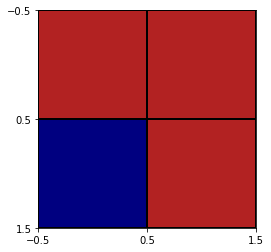

In [132]:
plota_quad([[0,0],[1,0]])

BUSCANDO OS VALORES DE b1 E b2 PARA K = 0.2

1.0 40000 0


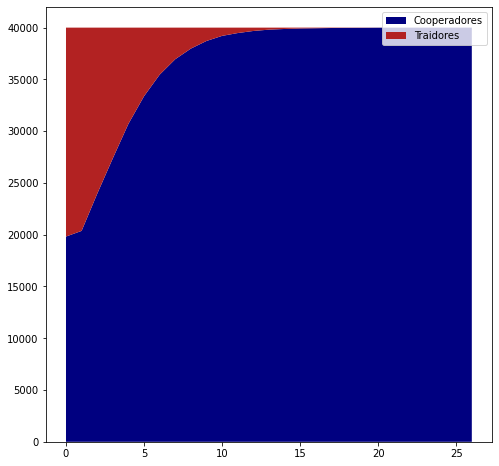

1.1 40000 0


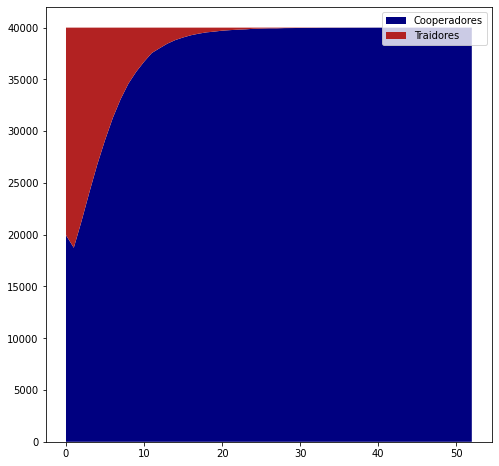

1.2 40000 0


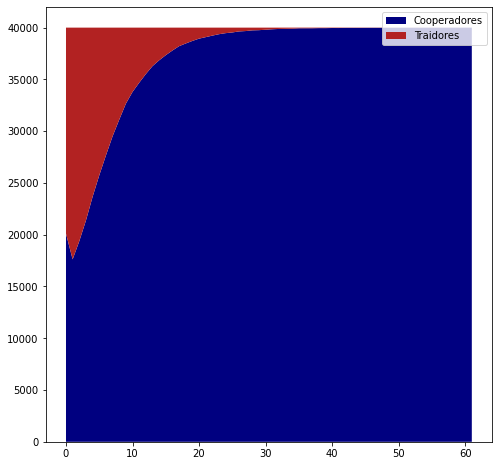

1.3 40000 0


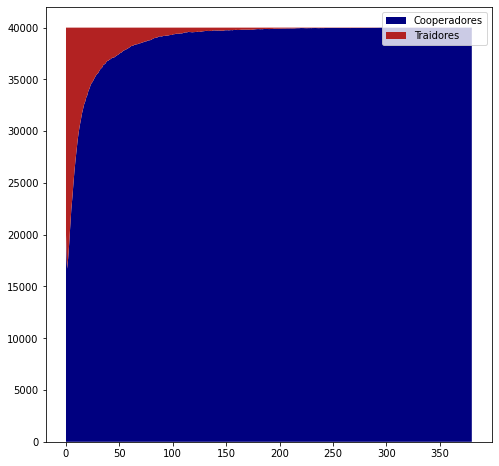

1.4 25263 14737


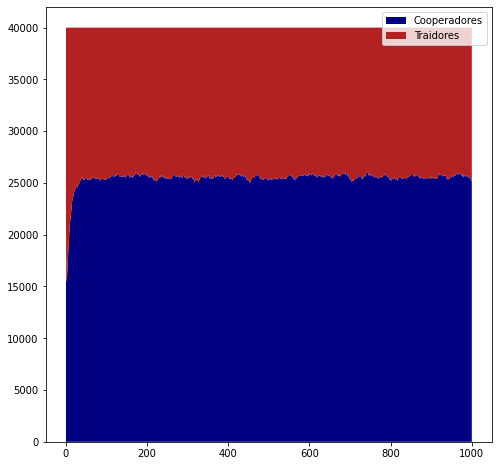

1.5 18255 21745


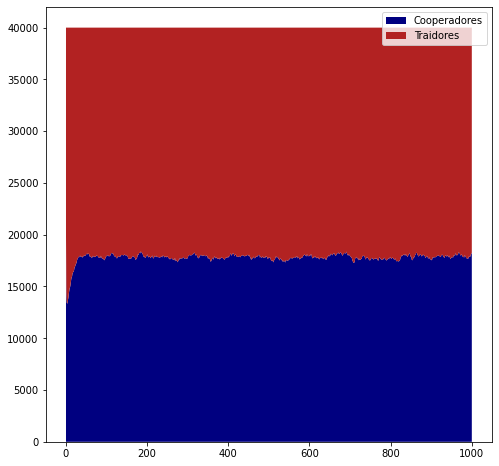

1.6 11396 28604


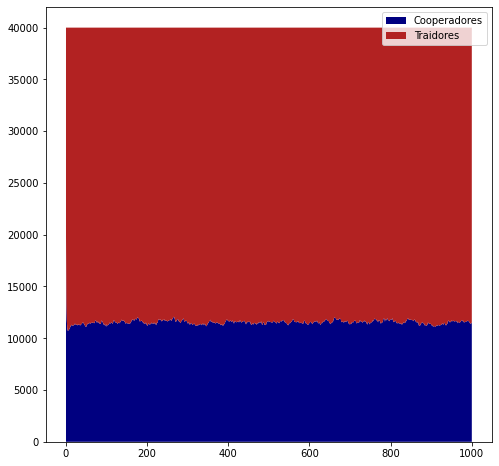

1.7000000000000002 6819 33181


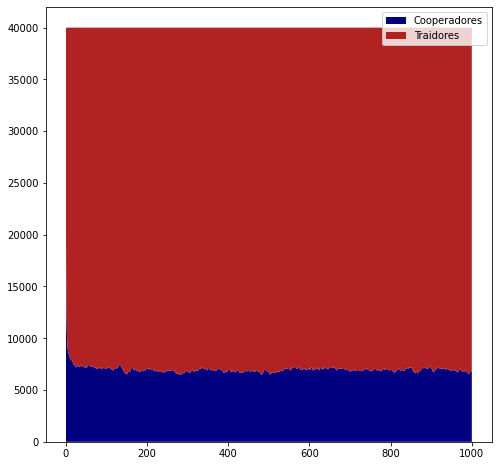

1.8 0 40000


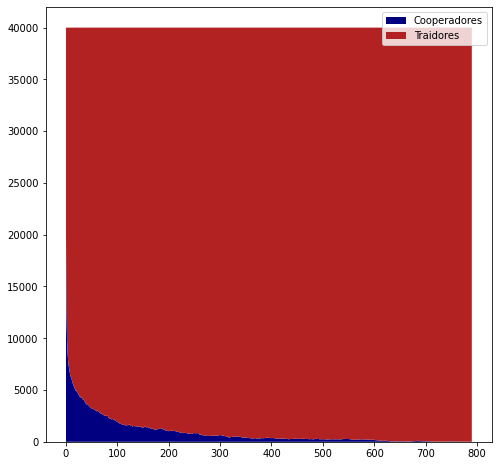

1.9 0 40000


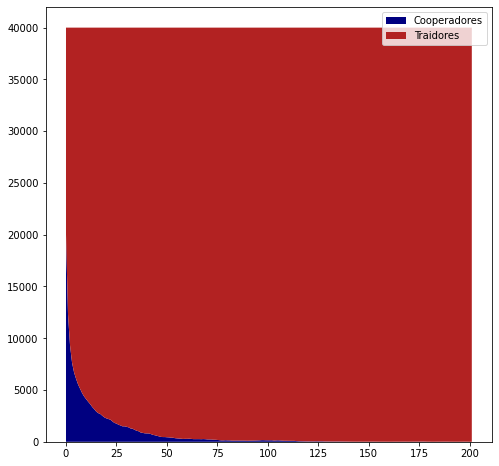

2.0 0 40000


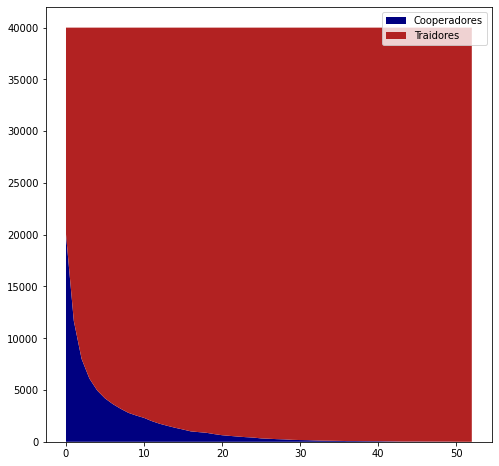

In [206]:
#Sistema
N = 200
populacao = np.zeros((N,N))
bs = np.linspace(1,2,11,endpoint=True)
k = 0.2

plotar = False
passos = 1000

for b in bs:
    populacao = cond_inic(populacao)
    payoff = matriz_ganho(1,0,b,0)

    a = True
    i = 0

    coop, trai = numeros_da_populacao(populacao)

    cooperadores = np.array([coop])
    traidores = np.array([trai])
    
    while a and i != passos:
        if plotar:
            plota_quad(populacao)
            display.clear_output(wait=True)

        populacao = evolui_contaminacao(populacao,payoff,k)

        coop, trai = numeros_da_populacao(populacao)
        cooperadores = np.append(cooperadores, coop)
        traidores = np.append(traidores, trai)


        a = checa_fim(populacao)
        i += 1

    if plotar:
        plota_quad(populacao)

    print(b, cooperadores[-1], traidores[-1])
    
    plt.figure(figsize=(8,8))
    plt.stackplot(np.linspace(0,len(cooperadores)-1,len(cooperadores),endpoint=True),[cooperadores,traidores],labels=["Cooperadores","Traidores"],colors=["navy","firebrick"])
    plt.legend()
    plt.show()

BUSCANDO O VALOR DE b1 PARA K = 0.2

1.25 40000 0


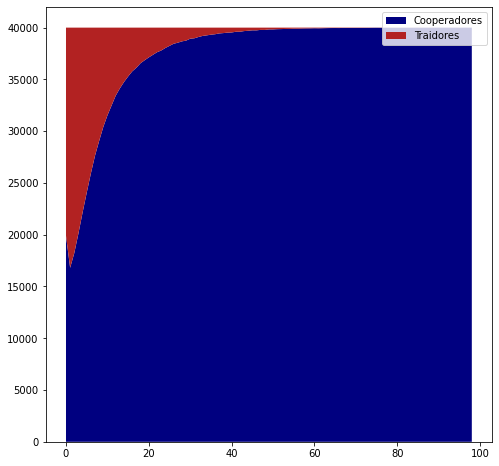

1.26 40000 0


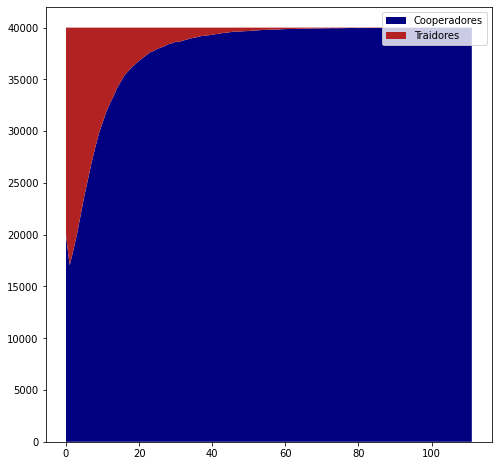

1.27 40000 0


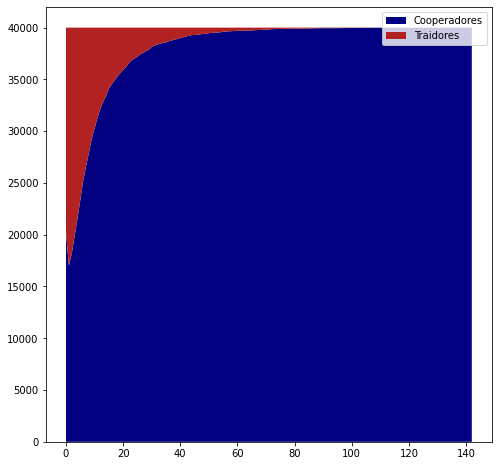

1.28 40000 0


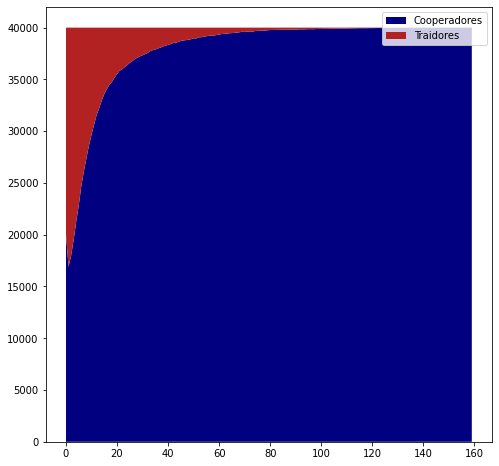

1.29 40000 0


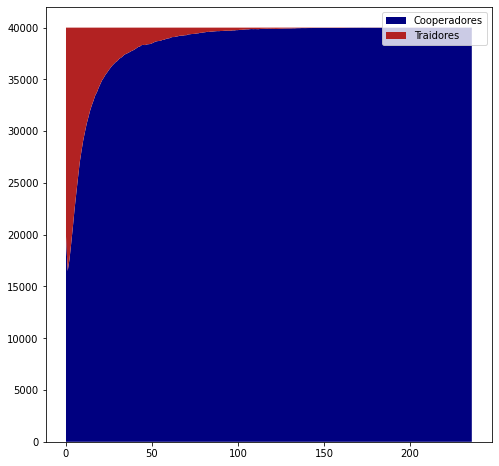

1.3 40000 0


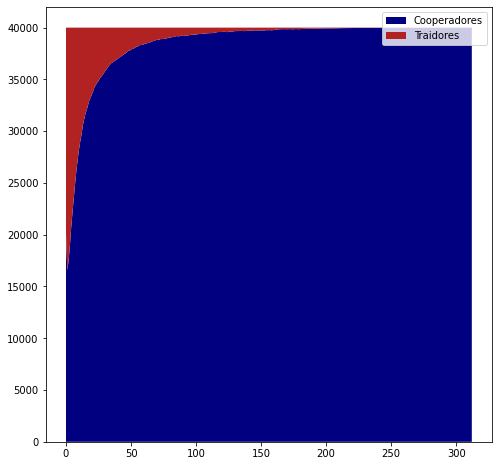

1.31 40000 0


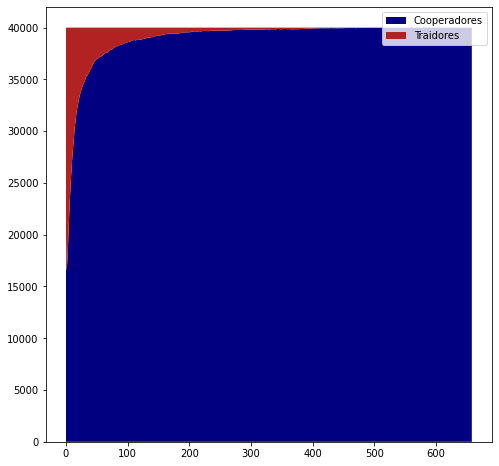

1.32 39904 96


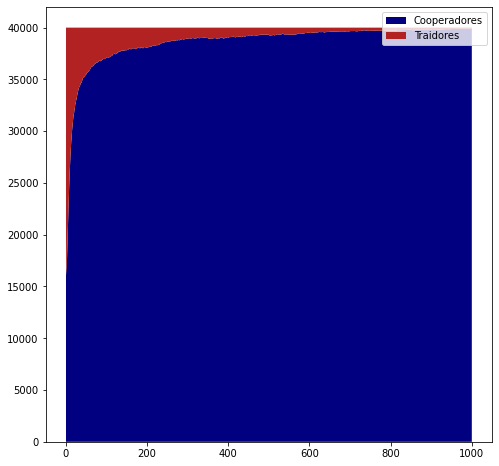

1.33 37149 2851


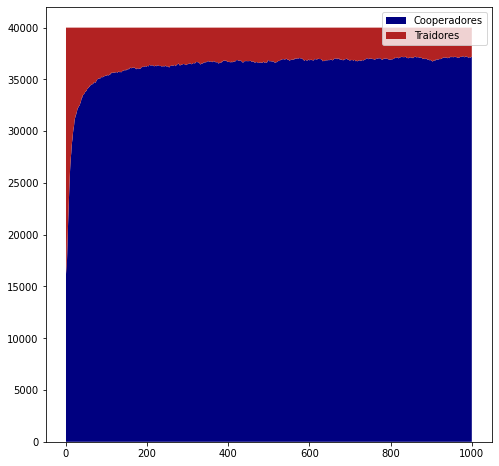

1.34 34016 5984


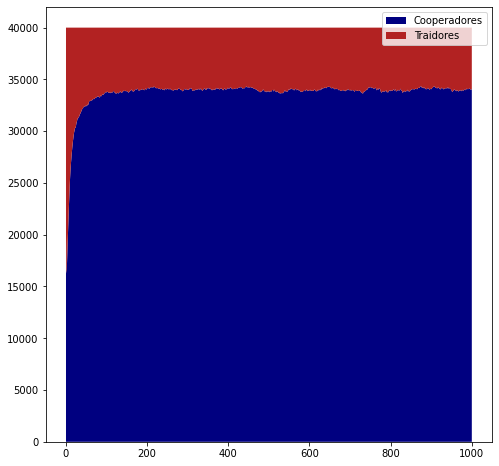

1.35 32110 7890


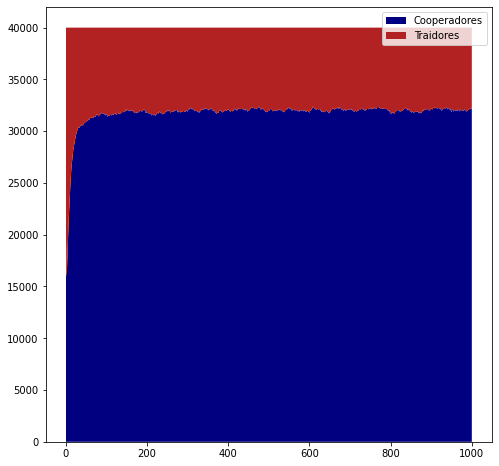

In [207]:
#Sistema
N = 200
populacao = np.zeros((N,N))
bs = np.linspace(1.25,1.35,11,endpoint=True)
k = 0.2

plotar = False
passos = 1000

for b in bs:
    populacao = cond_inic(populacao)
    payoff = matriz_ganho(1,0,b,0)

    a = True
    i = 0

    coop, trai = numeros_da_populacao(populacao)

    cooperadores = np.array([coop])
    traidores = np.array([trai])
    
    while a and i != passos:
        if plotar:
            plota_quad(populacao)
            display.clear_output(wait=True)

        populacao = evolui_contaminacao(populacao,payoff,k)

        coop, trai = numeros_da_populacao(populacao)
        cooperadores = np.append(cooperadores, coop)
        traidores = np.append(traidores, trai)


        a = checa_fim(populacao)
        i += 1

    if plotar:
        plota_quad(populacao)

    print(b, cooperadores[-1], traidores[-1])
    
    plt.figure(figsize=(8,8))
    plt.stackplot(np.linspace(0,len(cooperadores)-1,len(cooperadores),endpoint=True),[cooperadores,traidores],labels=["Cooperadores","Traidores"],colors=["navy","firebrick"])
    plt.legend()
    plt.show()

O valor de b1 é aproximadamente 1.31 para K = 0.2

BUSCANDO O VALOR DE b2  PARA K = 0.2

1.75 4421 35579


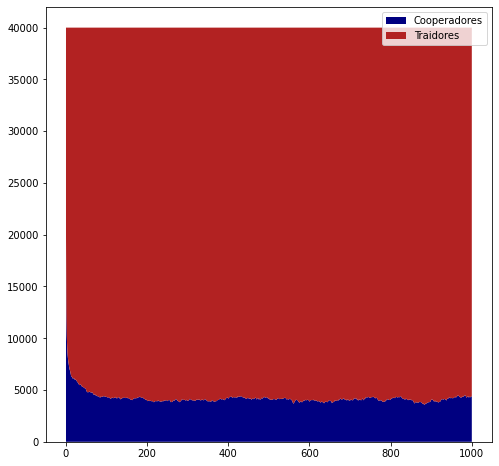

1.76 2686 37314


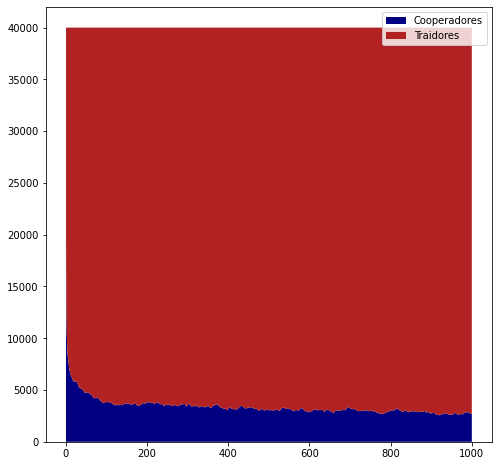

1.77 1111 38889


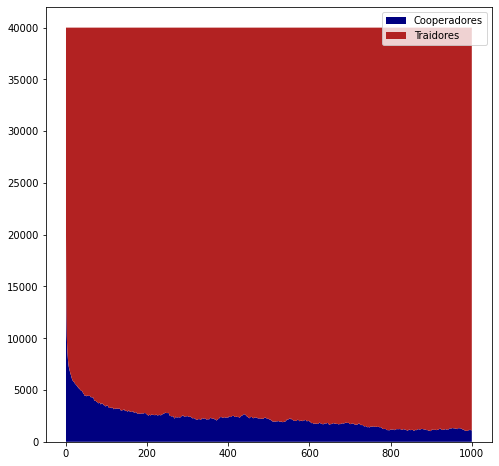

1.78 437 39563


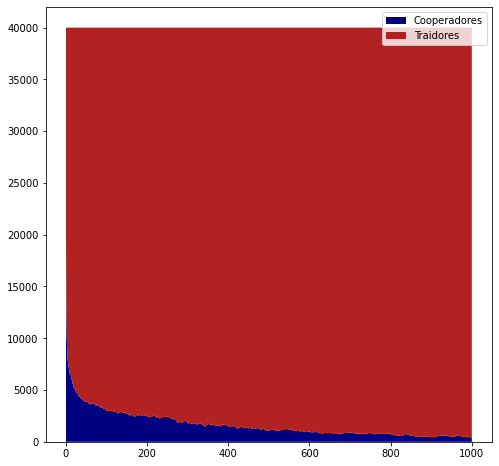

1.79 131 39869


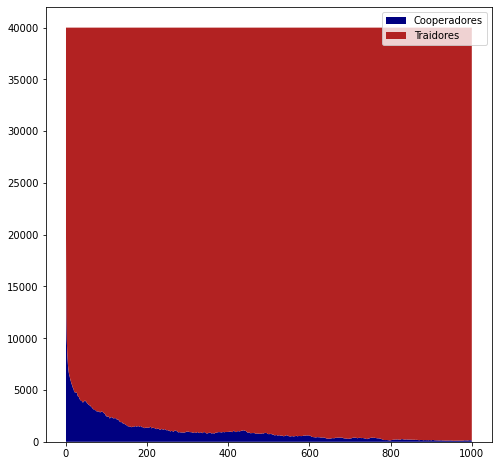

1.8 85 39915


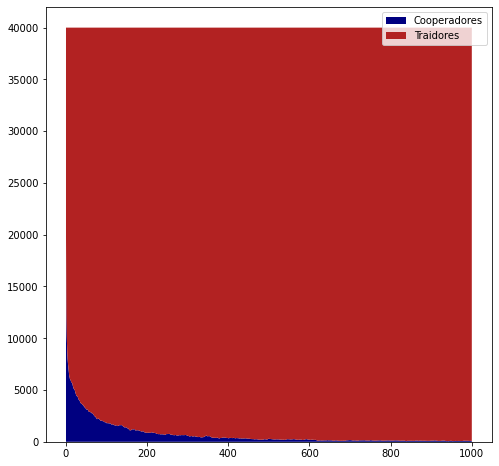

1.81 0 40000


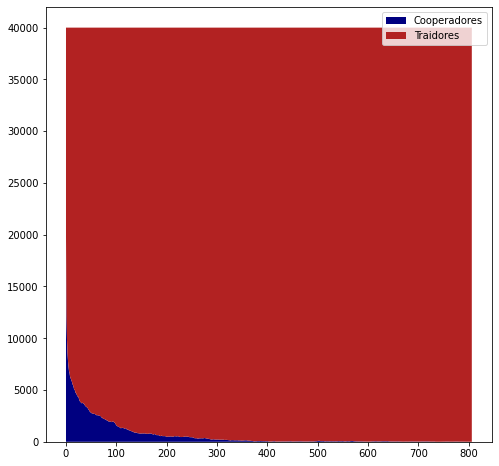

1.82 0 40000


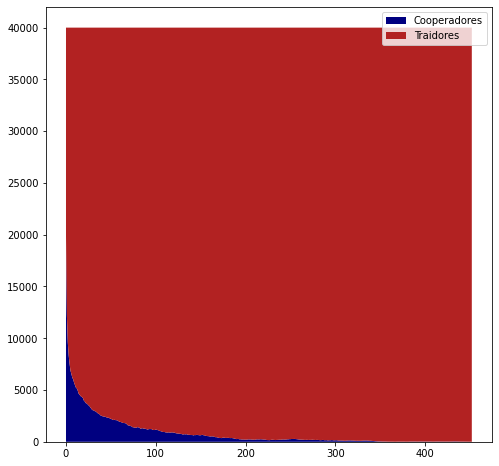

1.83 0 40000


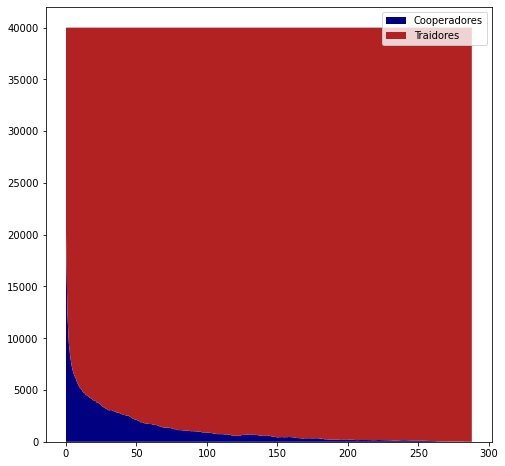

1.84 0 40000


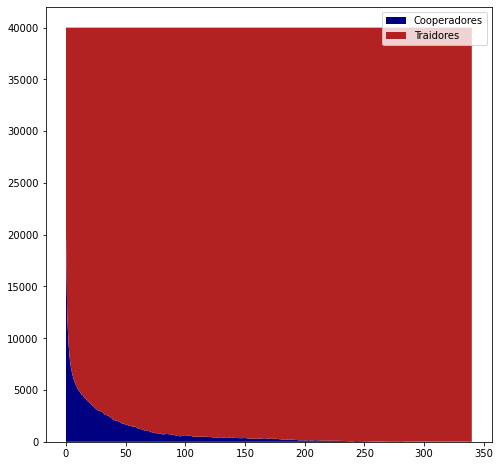

1.85 0 40000


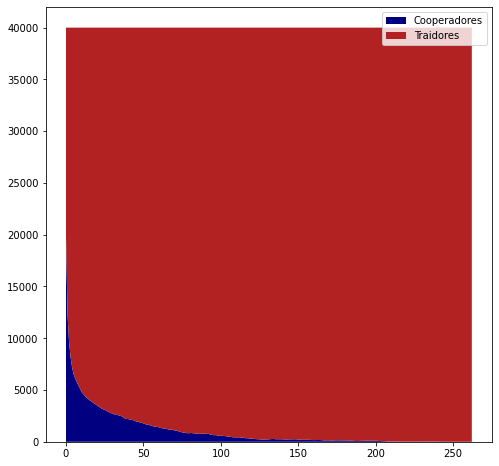

In [208]:
#Sistema
N = 200
populacao = np.zeros((N,N))
bs = np.linspace(1.75,1.85,11,endpoint=True)
k = 0.2

plotar = False
passos = 1000

for b in bs:
    populacao = cond_inic(populacao)
    payoff = matriz_ganho(1,0,b,0)

    a = True
    i = 0

    coop, trai = numeros_da_populacao(populacao)

    cooperadores = np.array([coop])
    traidores = np.array([trai])
    
    while a and i != passos:
        if plotar:
            plota_quad(populacao)
            display.clear_output(wait=True)

        populacao = evolui_contaminacao(populacao,payoff,k)

        coop, trai = numeros_da_populacao(populacao)
        cooperadores = np.append(cooperadores, coop)
        traidores = np.append(traidores, trai)


        a = checa_fim(populacao)
        i += 1

    if plotar:
        plota_quad(populacao)

    print(b, cooperadores[-1], traidores[-1])
    
    plt.figure(figsize=(8,8))
    plt.stackplot(np.linspace(0,len(cooperadores)-1,len(cooperadores),endpoint=True),[cooperadores,traidores],labels=["Cooperadores","Traidores"],colors=["navy","firebrick"])
    plt.legend()
    plt.show()

O valor de b2 é aproximadamente 1.81 para K = 0.2